# Project 2: Business Statistics: Axis Insurance

#### Context 

Leveraging customer information is of paramount importance for most businesses. In the case of an insurance company, the attributes of customers like the ones mentioned below can be crucial in making business decisions. Hence, knowing to explore and generate value out of such data can be an invaluable skill to have.


#### Data Dictionary 

1. Age - This is an integer indicating the age of the primary beneficiary (excluding those above 64 years, since they are generally covered by the government).
2. Sex - This is the policy holder's gender, either male or female.
3. BMI - This is the body mass index (BMI), which provides a sense of how over or underweight a person is relative to their height. BMI is equal to weight (in kilograms) divided by height (in meters) squared. An ideal BMI is within the range of 18.5 to 24.9.
4. Children - This is an integer indicating the number of children/dependents covered by the insurance plan.
5. Smoker - This is yes or no depending on whether the insured regularly smokes tobacco.
6. Region - This is the beneficiary's place of residence in the U.S., divided into four geographic regions - northeast, southeast, southwest, or northwest.
7. Charges​ - Individual medical costs billed to health insurance

The company has been asking for:

1. Explore the dataset and extract insights using Exploratory Data Analysis.
2. Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't? 
3. Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
4. Is the proportion of smokers significantly different across different regions?
5. Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

In [1]:
!pip install scipy==1.6.1

In [2]:
import scipy
scipy.__version__

'1.6.1'

In [5]:
#import the important packages
import pandas as pd #library used for data manipulation and analysis
import numpy as np # library used for working with arrays.
import matplotlib.pyplot as plt # library for plots and visualisations
import seaborn as sns # library for visualisations
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats # this library contains a large number of probability distributions as well as a growing library of statistical functions.

In [6]:
mydata = pd.read_csv('AxisInsurance.csv')
mydata.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [26]:
mydata.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [14]:
#understand data shape
mydata.shape

(1338, 7)

Dataset has 1338 rows and 7 columns.

In [5]:
#check the datatypes of the columns for the dataset
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### Fixing the data types
1. Variable as Age and Children are Integer; variables as bmi and charges are Float. Both, are valid data type. 
2. Sex, smoker and region are of object type, we can change them to categories.
3. Converting "objects" to "category" reduces the data space to store dataframe

In [6]:
# categorical column should be converted to categorical type 

mydata['sex']=mydata.sex.astype('category')
mydata['smoker']=mydata.smoker.astype('category')
mydata['region']=mydata.region.astype('category')


In [29]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


- Sex, smoker and region have been converted  to categories.
- we can see that the memory usage has decreased from 73.3KB to 46.2KB

### Statistical Summary for the dataset

In [7]:
mydata.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


- Age, BMI, Children has approximately same mean an median
- Charges is significally greater than the median, this suggest that is right skewed

In [8]:
mydata.describe(include=["category"])

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


- The gender of the policy holder (male and female) are almost the same, however the predominant for just a few is the Male.
- Non smoker is the predominant (1064) compare with the smokers (274).
- From the regions northeast, southeast, southwes and northwest. Most of people live in the southeast region(364).

In [9]:
#check missing values
mydata.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

- There are no missing values in the data.

## 1. Explore the dataset and extract insights using EDA

### Univariate Analysis

In [10]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Observations on Age

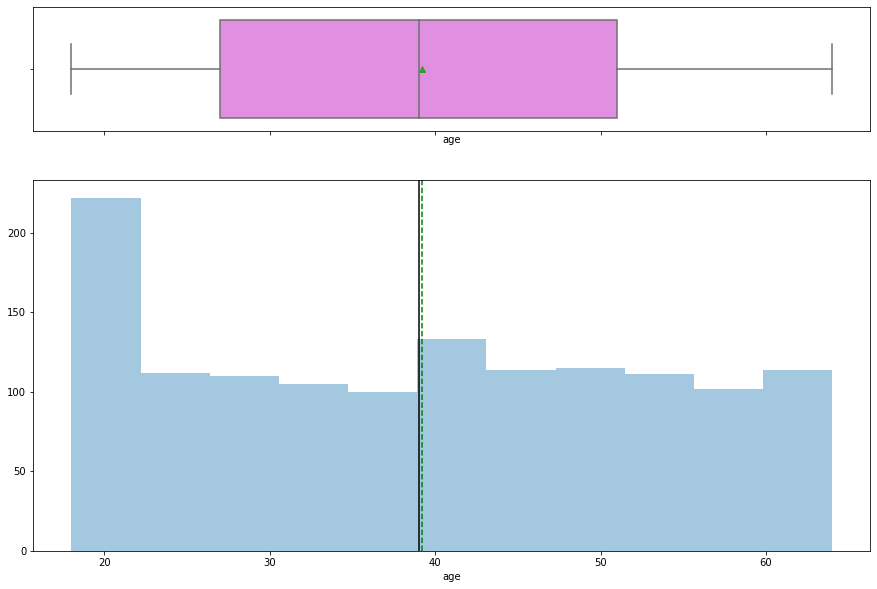

In [37]:
histogram_boxplot(mydata["age"])

- From boxplot we can see that the third quartile(Q3) is equal to 51 which means 75% of policy holders are below the age of 51.
- Most of the people from this dataframe are at the early age of the distribution 18-22 years old.
- Mean and media are almost the same.

#### Observations on BMI

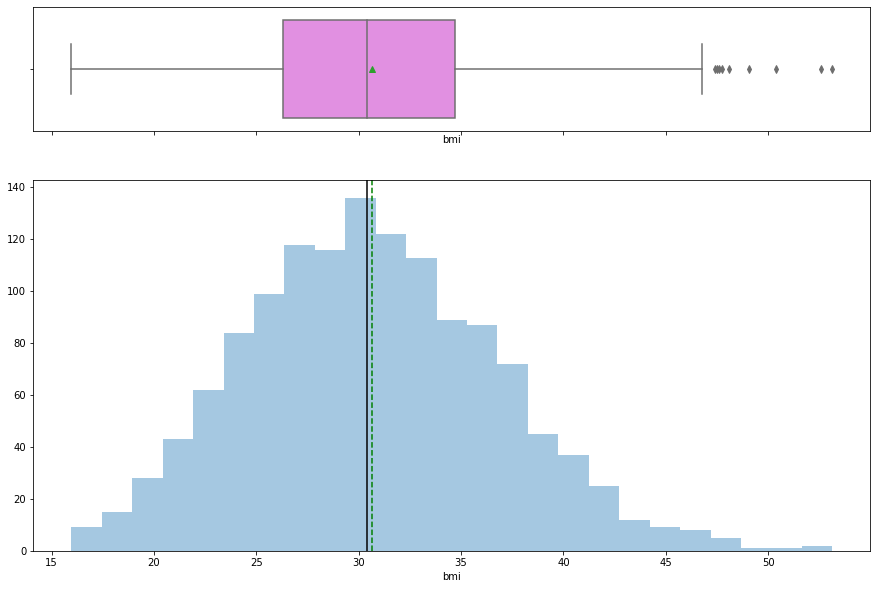

In [38]:
histogram_boxplot(mydata["bmi"])

- Mean and Media are almost the same
- From boxplot we can see that the population from the third quartile(Q3) equal to 34.7 to the first quartile (Q1) equal to 26.3 where concentrates pretty much 75 % of the popupulation are out of the range to have an ideal BMI (18.5-24.9).
- Boxplot shows a lot outliners after aprox BMI 46 kg/m
- From the distplot shape we can see a very close normal distribution shape.

#### Observations on Children

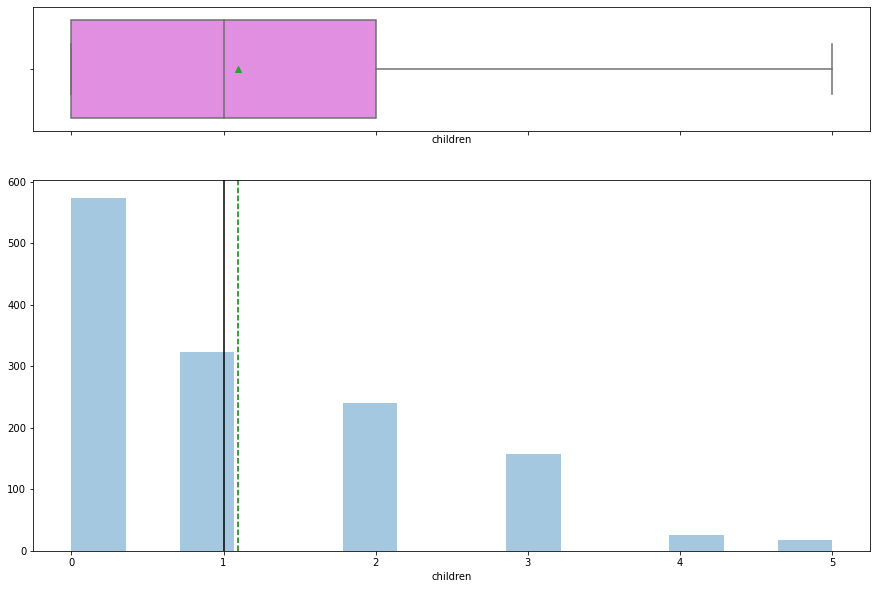

In [39]:
histogram_boxplot(mydata["children"])

- From boxplot we can see that the third quartile(Q3) is equal to 2 which means 75% of policy holders have less or equal to 2 children.
- Most of the policy holders on this dataframe dont have kids.

#### Observations on Charges

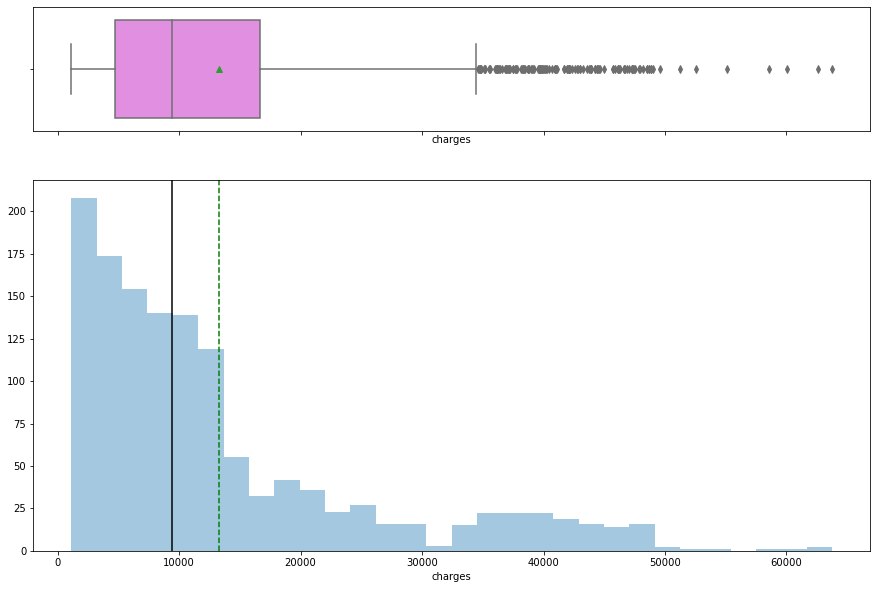

In [41]:
histogram_boxplot(mydata["charges"])

- Charges distribution is right skewed
- It has many outliners after the whisker, some policy holders were charged for more than 35k
- Mean charges of the policy holders is 13K

In [43]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

#### Observations on Sex

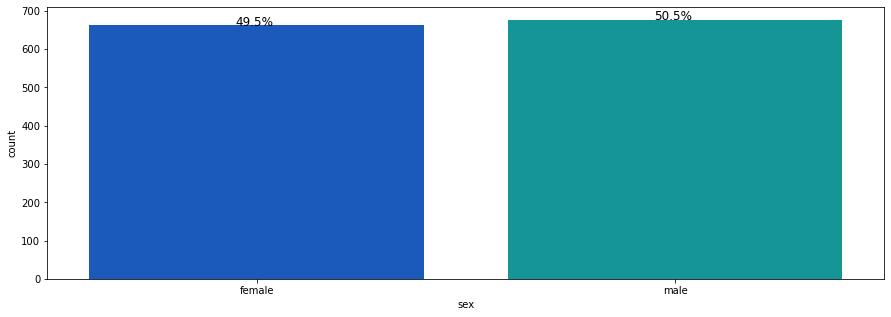

In [44]:
plt.figure(figsize=(15,5))
ax = sns.countplot(mydata["sex"],palette='winter')
perc_on_bar(ax,mydata["sex"])

- There are more males policy holders(50.5%) than females(49.5%)

#### Observations on Smoker

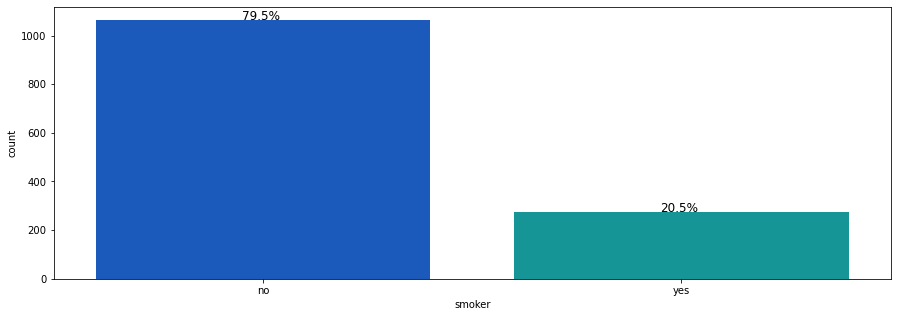

In [45]:
plt.figure(figsize=(15,5))
ax = sns.countplot(mydata["smoker"],palette='winter')
perc_on_bar(ax,mydata["smoker"])

- There are more non smoker policy holders(79.5%) than smokers(20.5%)

#### Observations on Region

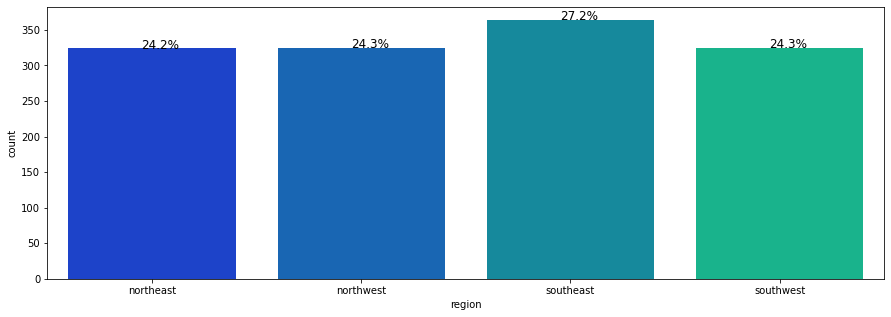

In [46]:
plt.figure(figsize=(15,5))
ax = sns.countplot(mydata["region"],palette='winter')
perc_on_bar(ax,mydata["region"])

- Most of the policy holders live live in the southeast region of the country (27.2%). The other regions are very equally distributed by (24.3%)

### Bivariate Analysis

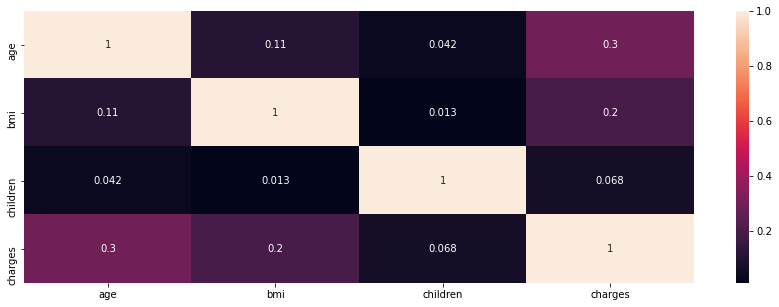

In [47]:
plt.figure(figsize=(15,5))
sns.heatmap(mydata.corr(),annot=True)
plt.show()

- All the correlations between eachother are positive however not very strong.

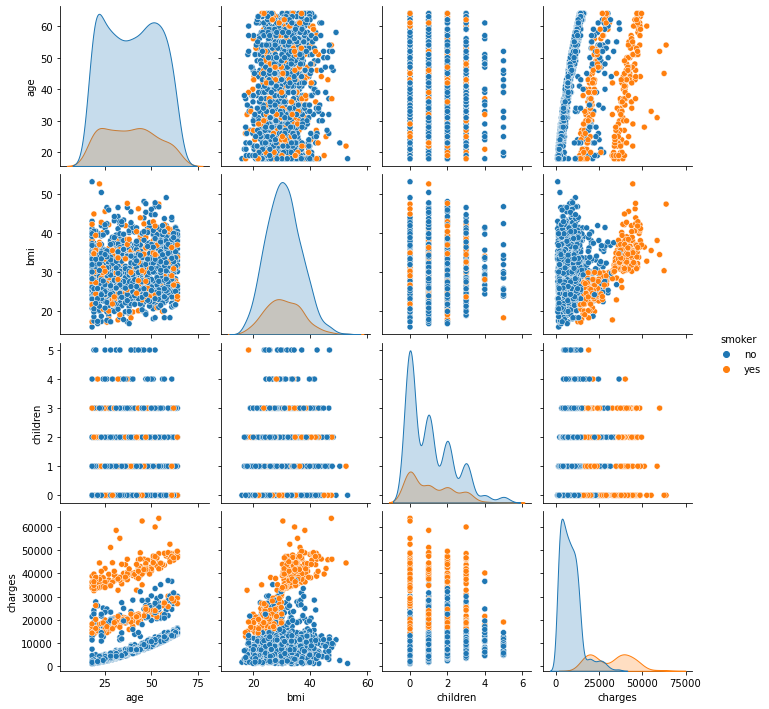

In [51]:
sns.pairplot(data=mydata, hue="smoker")
plt.show()

-  We can see varying distributions in variables for different products, we should investigate it further.

#### Smoker vs Age

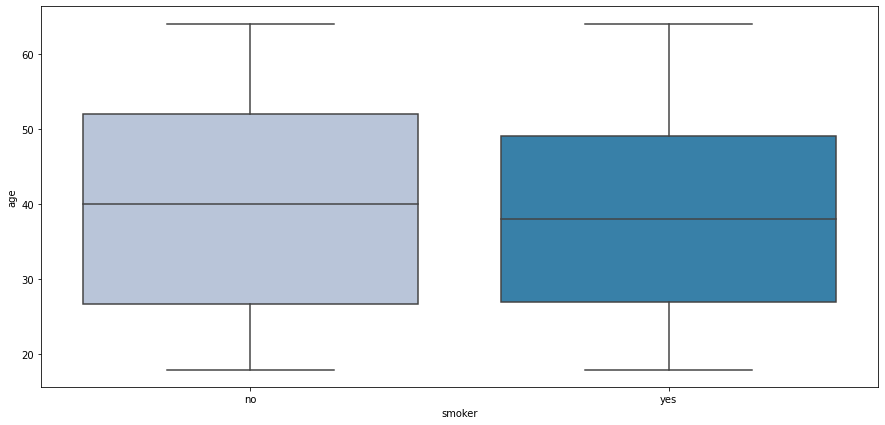

In [53]:
plt.figure(figsize=(15,7))
sns.boxplot(mydata["smoker"],mydata["age"],palette="PuBu")
plt.show()

- Both, smokers and non smokers seems to be around the same range of age, however for the smokers the mean seems to be around 39 while the smokers are 40. 
- Q3 for non smokers is above 50 around 52 while Q3 for smokers is 49.

#### Smoker vs BMI

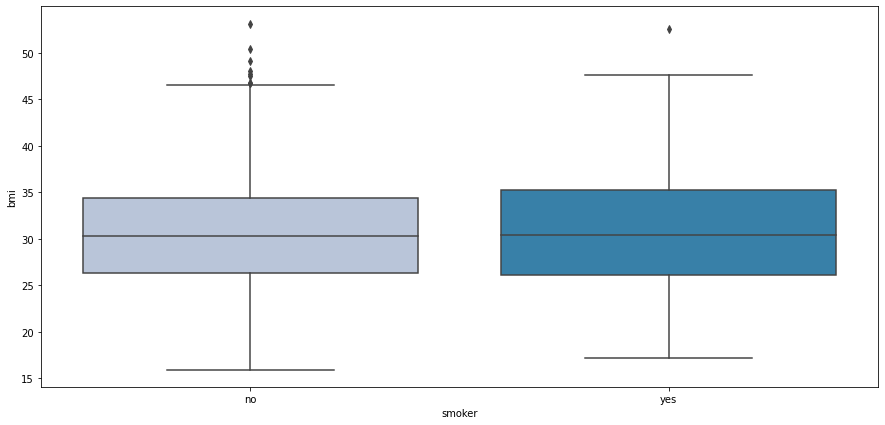

In [54]:
plt.figure(figsize=(15,7))
sns.boxplot(mydata["smoker"],mydata["bmi"],palette="PuBu")
plt.show()

- Both, smokers and non smokers are around the same BMI ranges.
- Non smokers are showing a high volume of outliner with a BMI greater than 46

#### Smoker vs Children

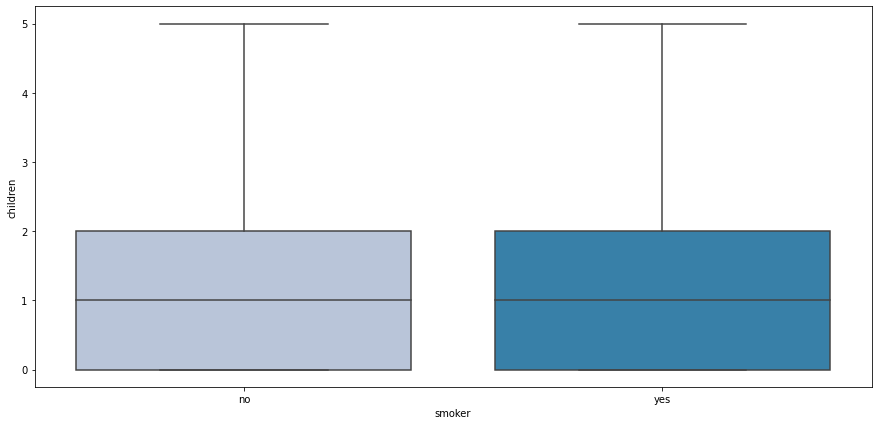

In [55]:
plt.figure(figsize=(15,7))
sns.boxplot(mydata["smoker"],mydata["children"],palette="PuBu")
plt.show()

- The proporton for smoker and non smokers on childrens seems to be equal.

#### Smoker vs charges

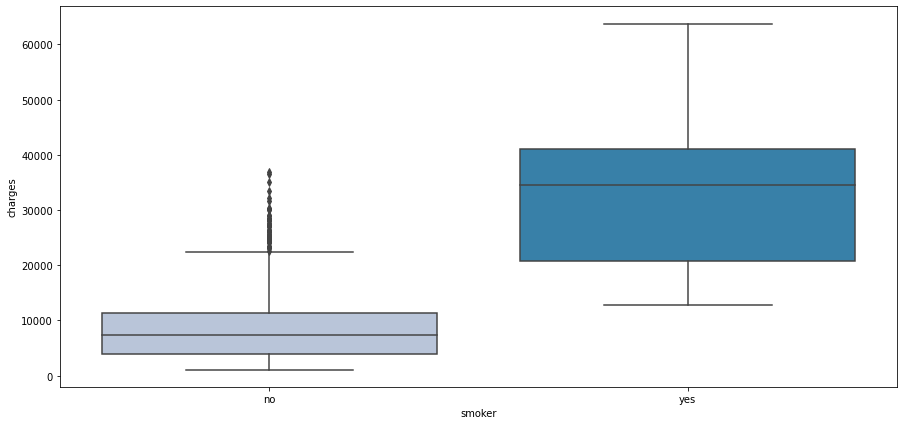

In [57]:
plt.figure(figsize=(15,7))
sns.boxplot(mydata["smoker"],mydata["charges"],palette="PuBu")
plt.show()

- Smokers have higher charges, ranged between around 13k to the 65 k, mean around 34k and Q3 (75% of the smokers) below 41K.
- No smokers tend to have lower charges where most of the population is between around 1k to 21k, mean around 8K and Q3 (75% of the non smokers population) on 11k
- Non smokers policy holders have less charges than the smokers. However, the show some outliners between around 22k to 39K

#### Smoker vs Sex

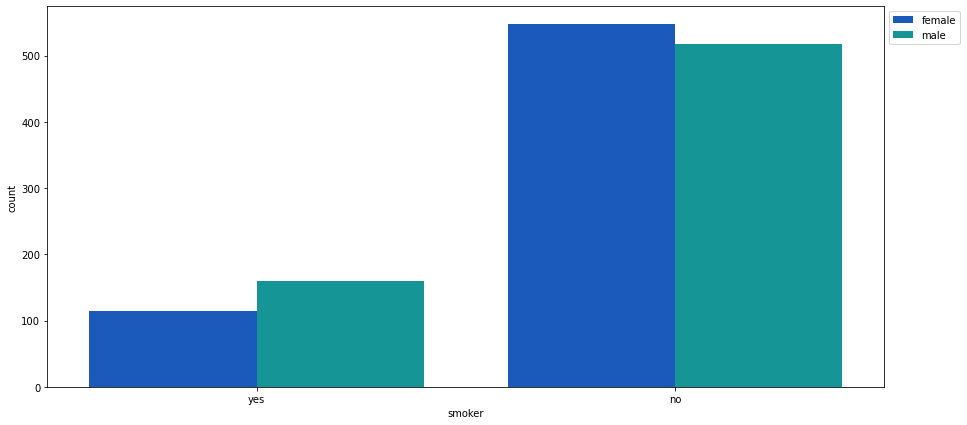

In [12]:
plt.figure(figsize=(15,7))
sns.countplot(mydata["smoker"],hue=mydata["sex"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()


- The proportions between male and female, behave the opposite on smokers and non smoker. while non smoker most of the populations are females, for smokers most of the population are males.

#### Smoker vs Region

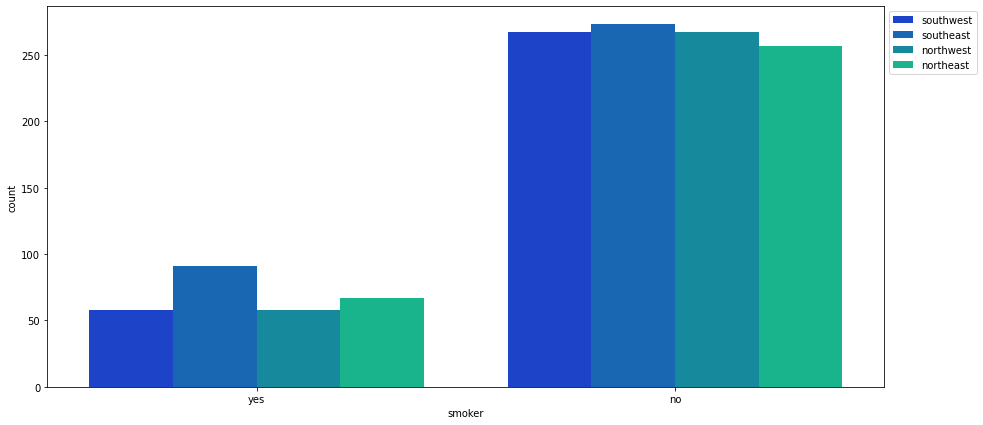

In [13]:
plt.figure(figsize=(15,7))
sns.countplot(mydata["smoker"],hue=mydata["region"],palette='winter')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- Most of the smokers live in southeast region, However, the tendency doesn’t follow a specific patron.


#### BMI vs SEX

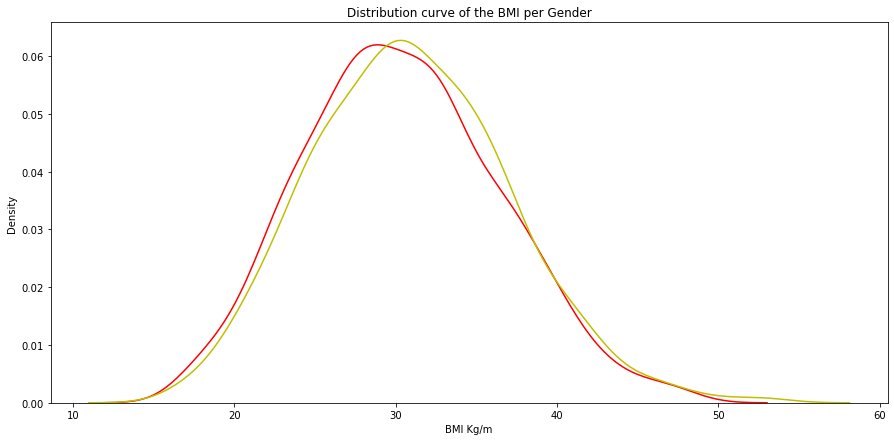

In [16]:
#define a function for sex
female=mydata[mydata["sex"]=="female"]
male=mydata[mydata["sex"]=="male"]
#plot it
plt.figure(figsize=(15,7))
sns.distplot(x=female['bmi'],color='r', hist=False)
sns.distplot(x=male['bmi'],color='y',hist=False)
plt.xlabel('BMI Kg/m')
plt.title('Distribution curve of the BMI per Gender')

plt.show()

- The BMI distribution curve have the same behavior for both, male and female.

#### AGE vs CHILDREN

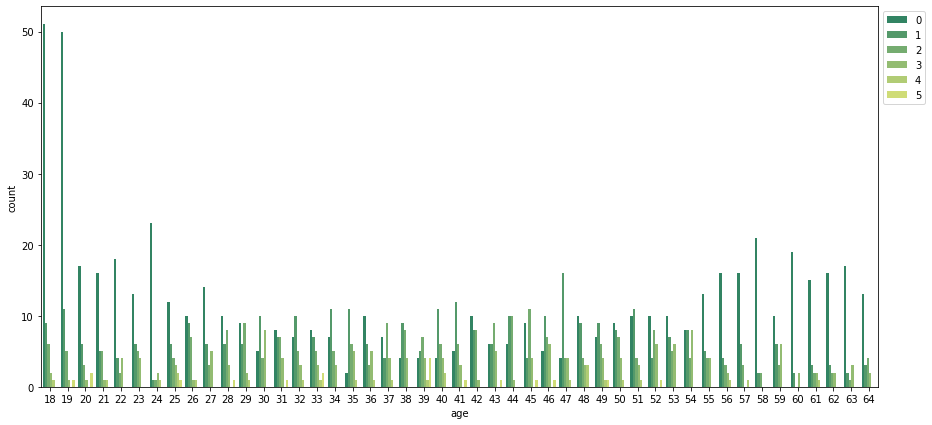

In [20]:
plt.figure(figsize=(15,7))
ax = sns.countplot(mydata["age"],hue=mydata["children"],palette='summer')
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

- Most of the people from this data sample are distributed the very young age where most of them do not have kids.
- Most of the population from the middle age (25-54 approx)have equal or more than one child that is dependent under the policy holder.
- From 55 and older the proportion of the number of children start decreasing because assiming that they become older, therefore are not able to go under the policy holder.

#### AGE vs BMI

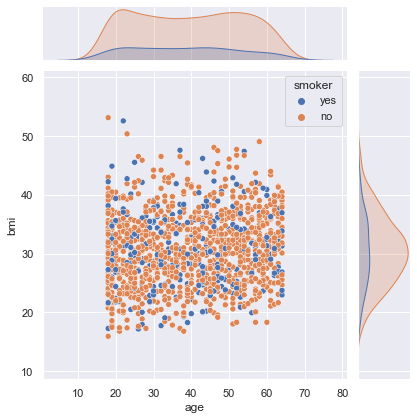

In [25]:
#plots 

sns.set_theme(style="darkgrid")
sns.jointplot(x="age", y="bmi", hue="smoker",data=mydata)


- The BMI data is distributed regardless the age and the smoking habits.

#### AGE vs CHARGES

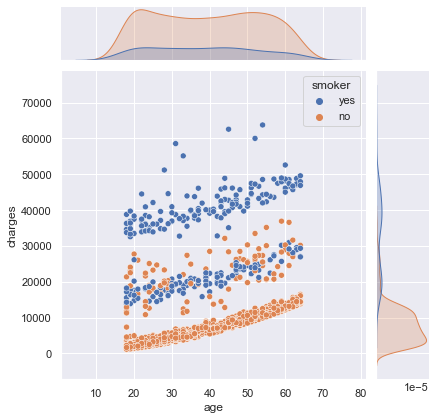

In [27]:

sns.set_theme(style="darkgrid")
sns.jointplot(x="age", y="charges", hue="smoker",data=mydata)

- As should be predicted, the charge amount of the medical claims increase proportionally as the person get older, however, the amont is higher when the individual smokes.

### Grouping data w.r.t to smoker to build customer profiles

In [17]:
#define a function for smokers
smoker=mydata[mydata["smoker"]=="yes"]
smoker.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,274.000000,274,274.000000,274.000000,274,274,274.000000
unique,NaN,2,NaN,NaN,1,4,NaN
top,NaN,male,NaN,NaN,yes,southeast,NaN
freq,NaN,159,NaN,NaN,274,91,NaN
mean,38.514599,NaN,30.708449,1.113139,NaN,NaN,32050.231832
std,13.923186,NaN,6.318644,1.157066,NaN,NaN,11541.547176
min,18.000000,NaN,17.195000,0.000000,NaN,NaN,12829.455100
25%,27.000000,NaN,26.083750,0.000000,NaN,NaN,20826.244213
50%,38.000000,NaN,30.447500,1.000000,NaN,NaN,34456.348450
75%,49.000000,NaN,35.200000,2.000000,NaN,NaN,41019.207275


In [19]:
#define a function for non-smokers
non_smoker=mydata[mydata["smoker"]=="no"]
non_smoker.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1064.000000,1064,1064.000000,1064.000000,1064,1064,1064.000000
unique,NaN,2,NaN,NaN,1,4,NaN
top,NaN,female,NaN,NaN,no,southeast,NaN
freq,NaN,547,NaN,NaN,1064,273,NaN
mean,39.385338,NaN,30.651795,1.090226,NaN,NaN,8434.268298
std,14.083410,NaN,6.043111,1.218136,NaN,NaN,5993.781819
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,26.750000,NaN,26.315000,0.000000,NaN,NaN,3986.438700
50%,40.000000,NaN,30.352500,1.000000,NaN,NaN,7345.405300
75%,52.000000,NaN,34.430000,2.000000,NaN,NaN,11362.887050


- There is a slighltly differences between the ranges on the different catergories between smokers and non smokers. however, the most higligthed ones would be the the charges that it is very explicted as it was metioned before, were charges for smokers are greater than for non smokers.

## 2. Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?

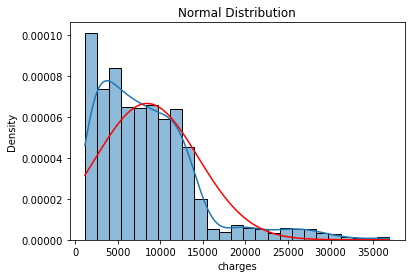

In [20]:
# calculate the pdf of Non Smokers claim using norm.pdf()
density = pd.DataFrame()
density["x"] = np.linspace(
    non_smoker["charges"].min() - 0.01, non_smoker["charges"].max() + 0.01, 100
)
density["pdf"] = norm.pdf(density["x"],8434.26, 5993.78)

fig, ax = plt.subplots()
# plot the distribution of data using histogram
sns.histplot(non_smoker["charges"], ax=ax, kde=True, stat="density")
# plot the pdf of the normal distribution
ax.plot(density["x"], density["pdf"], color="red")
plt.title("Normal Distribution")
plt.show()

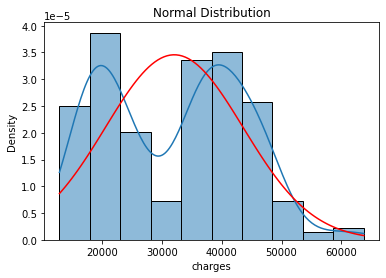

In [21]:
# calculate the pdf of Smokers claim using norm.pdf()
density = pd.DataFrame()
density["x"] = np.linspace(
    smoker["charges"].min() - 0.01, smoker["charges"].max() + 0.01, 100
)
density["pdf"] = norm.pdf(density["x"], 32050.23, 11541.54)

fig, ax = plt.subplots()
# plot the distribution of data using histogram
sns.histplot(smoker["charges"], ax=ax, kde=True, stat="density")
# plot the pdf of the normal distribution
ax.plot(density["x"], density["pdf"], color="red")
plt.title("Normal Distribution")
plt.show()

Under Central Limit Theorem,it woll follow these assumptions:

- The sampling distribution of the sample means will approach normal distribution as the sample size gets bigger, no matter what the shape of the population distribution is.
- Data ramdomly sampled
- Sample values are independent from each other
- Samples come from the same distribution
- Sample size sufficiently large (≥30)


#### The null and alternative hypothesis

Let $\mu_1, \mu_2$ be the mean of charges from smokers and non smokers respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2$

against the alternative hypothesis

>$H_a: \mu_1 > \mu_2$ 

In [7]:
# find the sample means and sample standard deviations for the two samples
print('The mean of charges from policy holders that smoke is ' + str(smoker['charges'].mean()))
print('The mean of charges from policy holders that no smoke is ' + str(non_smoker['charges'].mean()))
print('The standard deviation of charges from policy holders that smoke is ' + str(round(smoker['charges'].std(),2)))
print('The standard deviation charges from policy holders that no smoke is ' + str(round(non_smoker['charges'].std(),2)))

The mean of charges from policy holders that smoke is 32050.23183153285
The mean of charges from policy holders that no smoke is 8434.268297856199
The standard deviation of charges from policy holders that smoke is 11541.55
The standard deviation charges from policy holders that no smoke is 5993.78


#### Test whether the T-test assumptions are satisfied or not

- Continuous data - Yes, the individual medical costs billed to health insurance is measured on a continuous scale.
- Normally distributed populations - The populations are assumed to be normal.
- Independent populations - As we are taking random samples for two different type of people (smokers and non-smokers, the two samples are from two independent populations.
- Unequal population standard deviations - As the sample standard deviations are different, the population standard deviations may be assumed to be different.
- Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.
- Significance level 0.05
> Can use two sample T-test for this problem.

In [9]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(smoker['charges'], non_smoker['charges'], equal_var = False, alternative = 'greater')
print('The p-value is ' + str(p_value))

The p-value is 2.94473222335849e-103


#### Insight

As the p-value (~0.00) is significatly less than the level of significance, we can reject the null hypothesis. Thus, it may be concluded that there is enough statical evidence to say that the medical claims made by the people who smoke are greater than those who don't.

## 3. Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.

In [9]:
female.bmi.head()

0    27.90
5    25.74
6    33.44
7    27.74
9    25.84
Name: bmi, dtype: float64

In [12]:
male.bmi.head()

1    33.770
2    33.000
3    22.705
4    28.880
8    29.830
Name: bmi, dtype: float64

In [14]:
# import the required function
from scipy.stats import norm

# estimate the mean and standard deviation of the Female BMI data
mu_female = female["bmi"].mean()
sigma_female = female["bmi"].std()
print("The estimated mean is", round(mu_female, 2))
print("The estimated standard deviation is", round(sigma_female, 2))

The estimated mean is 30.38
The estimated standard deviation is 6.05


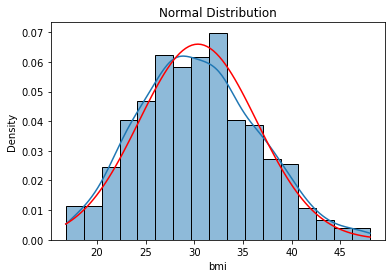

In [18]:
# calculate the pdf of Female BMI using norm.pdf()
density = pd.DataFrame()
density["x"] = np.linspace(
    female["bmi"].min() - 0.01, female["bmi"].max() + 0.01, 100
)
density["pdf"] = norm.pdf(density["x"], mu_female, sigma_female)

fig, ax = plt.subplots()
# plot the distribution of data using histogram
sns.histplot(female["bmi"], ax=ax, kde=True, stat="density")
# plot the pdf of the normal distribution
ax.plot(density["x"], density["pdf"], color="red")
plt.title("Normal Distribution")
plt.show()

#### Insight
As you can see in the above plot, there are two curves red and blue. Blue curve represents the shape of data distribution and red curve represnts the PDF ( Probability density function ). This data is approximately normal. Thus, we can assume this data distribution to be normal and perform our calculations based on normality assumption

>X ~N($\mu, \sigma$)

In [19]:
# estimate the mean and standard deviation of the Male BMI data
mu_male = male["bmi"].mean()
sigma_male = male["bmi"].std()
print("The estimated mean is", round(mu_male, 2))
print("The estimated standard deviation is", round(sigma_male, 2))

The estimated mean is 30.94
The estimated standard deviation is 6.14


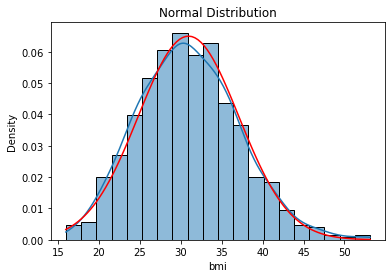

In [20]:
# calculate the pdf of Male BMI using norm.pdf()
density = pd.DataFrame()
density["x"] = np.linspace(
    male["bmi"].min() - 0.01, male["bmi"].max() + 0.01, 100
)
density["pdf"] = norm.pdf(density["x"], mu_male, sigma_male)

fig, ax = plt.subplots()
# plot the distribution of data using histogram
sns.histplot(male["bmi"], ax=ax, kde=True, stat="density")
# plot the pdf of the normal distribution
ax.plot(density["x"], density["pdf"], color="red")
plt.title("Normal Distribution")
plt.show()

#### Insight
As you can see in the above plot, there are two curves red and blue. Blue curve represents the shape of data distribution and red curve represnts the PDF ( Probability density function ). This data is approximately normal. Thus, we can assume this data distribution to be normal and perform our calculations based on normality assumption

>X ~N($\mu, \sigma$)

### The null and alternative hypothesis

Let $\mu_f, \mu_m$ be the mean of the BMI from Females and Males respectively.

We will test the null hypothesis

>$H_0: \mu_f = \mu_m$

against the alternative hypothesis

>$H_a: \mu_f ≠ \mu_m$ 

#### Let's test whether the T-test assumptions are satisfied or not

- Continuous data - Yes, the usage time is measured on a continuous scale.
- Normally distributed populations - Yes, The populations are assumed to be normal.
- Independent populations - As we are taking random samples for two different type of users, the two samples are from two independent populations.
- Equal population standard deviations - As the sample standard deviations are almost equal, the population standard deviations may be assumed to be equal.
- Random sampling from the population - Yes, the collected sample is a simple random sample.

> We can use two sample T-test for this problem.

In [27]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(female['bmi'], male['bmi'], equal_var = True, alternative = 'two-sided')
print('The p-value is ' + str(p_value))

The p-value is 0.08997637178984934


#### Insight
As the p-value(~0.08) is greater than the level of significance, it can not be rejected the null hypothesis. Hence, we do not have enough significance to conclude that there is any difference between Females BMI and Male BMI at 0.05 significance level.

## 4.  Is the proportion of smokers significantly different across different regions?

In [4]:
#create contingency table

smoke_region=pd.crosstab(index=mydata['smoker'], columns=mydata['region'])
smoke_region1=pd.DataFrame(smoke_region,columns=['smoker','northeast','northwest','southeast','southwest'])
smoke_region1


,smoker,northeast,northwest,southeast,southwest
smoker,,,,,
no,NaN,257,267,273,267
yes,NaN,67,58,91,58



### The null and alternative hypothesis

We will test the null hypothesis

>$H_0:$ The smokers proportion is independent of the region

against the alternate hypothesis

>$Ha:$ The smokers proportion depends of the region

#### Let's test whether the assumptions are satisfied or not

- Categorical variables - Yes
- Expected value of the number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
- Random sampling from the population - Yes, The collected sample is a simple random sample.
- significance level 0.05

In [6]:
# import the required function
from scipy.stats import chi2_contingency

# find the p-value
chi, p_value, dof, expected = chi2_contingency(smoke_region1.drop('smoker', axis = 1))
print('The p-value is', p_value)

The p-value is 0.06171954839170547


#### Insight

As the p-value(~0.06) is greater than the significance level 0.05, it can not be rejected the null hypothesis. Thus, There's enough statistical evidence to conclude that the proportion of smokers is significantly different across different regions.

## 5. Is the mean BMI of women with no children, one child, and two children the same? Explain your answer with statistical evidence.

In [49]:
female.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
7,37,female,27.74,3,no,northwest,7281.50560
9,60,female,25.84,0,no,northwest,28923.13692


In [5]:
# get the levels of factor children
female['children'].value_counts()

0    289
1    158
2    119
3     77
4     11
5      8
Name: children, dtype: int64

In [6]:
# Drop of data from female with more than 2 kids
Female_1=female[female['children']<=2]
Female_1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92400
5,31,female,25.74,0,no,southeast,3756.62160
6,46,female,33.44,1,no,southeast,8240.58960
9,60,female,25.84,0,no,northwest,28923.13692
11,62,female,26.29,0,yes,southeast,27808.72510


In [7]:
#check the data
Female_1['children'].value_counts()

0    289
1    158
2    119
Name: children, dtype: int64

### The null and alternative hypothesis

Let $\mu_1, \mu_2, \mu_3$ be the means of women BMI with no children, one child, and two children respectively.

We will test the null hypothesis

>$H_0: \mu_1 = \mu_2 = \mu_3$

against the alternative hypothesis

>$H_a: $ At least one of the women BMI means is different from the rest.

children
0    30.361522
1    30.052658
2    30.649790
Name: bmi, dtype: float64


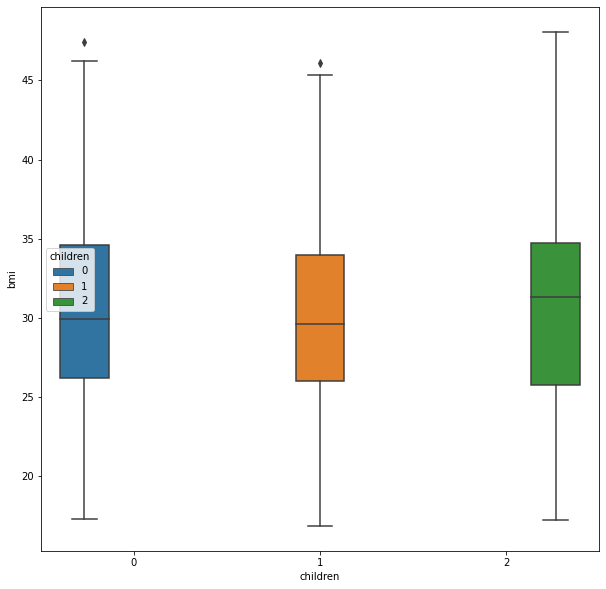

In [56]:
# mean of carbon emission at different levels of the fuel_type factor
print(Female_1.groupby("children")["bmi"].mean())

# draw the boxplot for visualization 
fig, ax = plt.subplots(figsize = (10,10))
a = sns.boxplot(x= "children", y = 'bmi' , data = Female_1, hue = 'children')
#a.set_title("Carbon Emission w.r.t. Fuel type (3 levels)", fontsize=15)
#plt.show()

#### Insight from the Boxplot

- The BMI for women that have 0 amd 1 kid shows outliners greater than 45.
- The BMI for women that have 0-2 kids are around the same range of numbers.

Now, the normality and equality of variance assumptions need to be checked.

- For testing of normality, Shapiro-Wilk’s test is applied to the response variable.

- For equality of varaince, Levene test is applied to the response variable.

### Shapiro-Wilk's Test



We will test the null hypothesis

>$H_0: $ BMI of women with no children, one child, and two children follows a normal distribution against

against the alternative hypothesis

>$H_a: $ At least one of the BMI of women with no children, one child, and two children does not follow a normal distribution

In [9]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(Female_1['bmi']) 
print('The p-value is', p_value)

The p-value is 0.010864038951694965


As the p-value (~0.01) is significatly less than the level of significance, then the hypothesis of normality will be rejected by the Shapiro test. On failing, the test can state that the data will not fit the distribution normally with 95% confidence.

### Levene's Test

We will test the null hypothesis

>$H_0: $ All the population variances are equal

against the alternative hypothesis

>$H_a: $ At least one variance is different from the rest

In [8]:
#Assumption 2: Homogeneity of Variance
#import the required function
from scipy.stats import levene
statistic, p_value = levene(Female_1['bmi'][Female_1['children']==0], 
                                   Female_1['bmi'][Female_1['children']==1], 
                                   Female_1['bmi'][Female_1['children']==2])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.3899432394522804


Since the p-value is large, we fail to reject the null hypothesis of homogeneity of variances.

#### Let's test whether the assumptions are satisfied or not

- The populations are normally distributed - No, however we are going to proceed with the one-way ANOVA because this is considered a robust test against normally assumption.
- Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
- Population variances are equal - Yes, the homogeneity of variance assumption is verified using the Levene's test.

### Find the P-value

In [10]:
#import the required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(Female_1['bmi'][Female_1['children']==0], 
                                   Female_1['bmi'][Female_1['children']==1], 
                                   Female_1['bmi'][Female_1['children']==2])
print('The p-value is ' + str(p_value))

The p-value is 0.7158579926754841


#### Insight

As the p-value(~0.72) is significaly greater than the significance level 0.05, it can not be rejected the null hypothesis. Thus, There's enough statistical evidence to conclude that the mean BMI of women with no children, one child, and two children are the same.